# Export VE Data as DataFrame for LME Cue Analysis

In [1]:
import csv
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
# residuals, complete ground plane, viewing duration, stimulus 

In [3]:
dpath = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/finalVEMatched/z_scored/'

# dpath = '/Users/pmahableshwarkar/Documents/Depth_Project/verbal_judgement_analysis/data/finalVEMatched/z_scored/'

# stim 
with open(dpath + 'z_final_stim_125.npy' , 'rb') as f:
    stim_125 = np.load(f, allow_pickle=True)
    
with open(dpath + 'z_final_stim_250.npy' , 'rb') as f:
    stim_250 = np.load(f, allow_pickle=True)

with open(dpath + 'z_final_stim_1000.npy' , 'rb') as f:
    stim_1000 = np.load(f, allow_pickle=True)
    
# residuals
with open(dpath + 'residuals/'+ 'z_residuals_125.npy' , 'rb') as f:
    residuals_125 = np.load(f, allow_pickle=True)
with open(dpath + 'residuals/'+ 'z_residuals_250.npy' , 'rb') as f:
    residuals_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'residuals/'+ 'z_residuals_1000.npy' , 'rb') as f:
    residuals_1000= np.load(f, allow_pickle=True)
    
# difference between z-scored estimate and z-scored actual depth
with open(dpath + '/diff_125.npy' , 'rb') as f:
    diff_125 = np.load(f, allow_pickle=True)
with open(dpath + '/diff_250.npy' , 'rb') as f:
    diff_250 = np.load(f, allow_pickle=True) 
with open(dpath + '/diff_1000.npy' , 'rb') as f:
    diff_1000= np.load(f, allow_pickle=True)
    

In [4]:
# path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUN_scene_cue_coding/GP_size_dict.json'
path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/SUN_scene_cue_coding/GP_size_dict.json'

gp_size_dict = json.load(open(path))

# Find GP or VGP Outliers 

gpsize_list = [[key, gp_size_dict[key]] for key in gp_size_dict]
gpsize_mean = np.mean(np.array([elem[1] for elem in gpsize_list]))
gpsize_std = np.std(np.array([elem[1] for elem in gpsize_list]))

gpsize_outlierRange = [gpsize_mean - (3*gpsize_std), gpsize_mean + (3*gpsize_std)]

cleaned_gpsize_dict = {}
for key in gp_size_dict:
    if gpsize_outlierRange[0] < gp_size_dict[key] < gpsize_outlierRange[1]:
        cleaned_gpsize_dict[key] = gp_size_dict[key]
    else:
        print(key, 'excluded')
        
ordered_gp_size = []
gp_none = 0


for folder in [elem.split('/')[1][:-2] for elem in stim_250]:
    try:
        ordered_gp_size.append(cleaned_gpsize_dict[folder])
    except:
        gp_none += 1
        ordered_gp_size.append(None)

002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize excluded
002657_2014-06-13_15-29-54_094959634447_rgbf000150-resize excluded


In [5]:
len(cleaned_gpsize_dict)

149

In [6]:

completeGP = []

trunc_residuals_125 = []
trunc_residuals_250 = []
trunc_residuals_1000 = []



stimulus = []

for stim in list(cleaned_gpsize_dict.keys()):
    index_125 = [elem.split('/')[1][:-2] for elem in stim_125].index(stim)
    index_250 = [elem.split('/')[1][:-2] for elem in stim_250].index(stim)
    index_1000 = [elem.split('/')[1][:-2] for elem in stim_1000].index(stim)
        
    trunc_residuals_125.append(residuals_125[index_125])
    trunc_residuals_250.append(residuals_250[index_250])
    trunc_residuals_1000.append(residuals_1000[index_1000])
        
    completeGP.append(cleaned_gpsize_dict[stim])
        
    stimulus.append(stim)
        
    
len(trunc_residuals_125), len(trunc_residuals_250), len(trunc_residuals_1000), len(completeGP), len(stimulus)

(149, 149, 149, 149, 149)

In [7]:
len([125] * len(trunc_residuals_125))

149

In [8]:
len(np.concatenate((np.abs(np.array(trunc_residuals_125)), np.abs(np.array(trunc_residuals_250)), np.abs(np.array(trunc_residuals_1000))), axis=0),)

447

In [9]:
# initialize data of lists.
data = {'residuals': trunc_residuals_125+trunc_residuals_250+trunc_residuals_1000,
        'abs_residuals': np.concatenate((np.abs(np.array(trunc_residuals_125)), np.abs(np.array(trunc_residuals_250)), np.abs(np.array(trunc_residuals_1000))), axis=0),
        'duration': [125] * len(trunc_residuals_125) + [250] * len(trunc_residuals_250) + [1000] * len(trunc_residuals_1000),
        'groundPlane': completeGP * 3,
        'stimulus': stimulus * 3}
  
# Create DataFrame
df = pd.DataFrame(data)
df

,residuals,abs_residuals,duration,groundPlane,stimulus
0,-0.583161,0.583161,125,11.910828,000854_2014-06-09_19-43-13_260595134347_rgbf00...
1,0.275925,0.275925,125,11.913177,000758_2014-06-08_22-05-08_260595134347_rgbf00...
2,-0.327997,0.327997,125,11.598019,002103_2014-06-25_20-00-40_260595134347_rgbf00...
3,-0.147574,0.147574,125,15.524304,002039_2014-06-24_20-22-38_260595134347_rgbf00...
4,-0.156264,0.156264,125,18.915500,000742_2014-06-08_18-48-09_260595134347_rgbf00...
...,...,...,...,...,...
442,-0.284820,0.284820,1000,28.953813,002964_2014-06-08_17-46-11_094959634447_rgbf00...
443,0.001737,0.001737,1000,15.893099,000943_2014-06-09_19-31-07_260595134347_rgbf00...
444,0.078397,0.078397,1000,10.664824,003070_2014-06-15_14-58-27_094959634447_rgbf00...
445,-0.068851,0.068851,1000,14.398279,001132_2014-06-17_14-48-54_260595134347_rgbf00...


In [11]:
df.to_csv('groundPlane_data_for_lme.csv', index=False)

# Add Participant Residuals

In [11]:
# p = '/Users/pmahableshwarkar/Documents/Depth_Project/verbal_judgement_analysis/data/finalVEMatched/z_scored/residuals/participant_residuals.csv'
p = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/finalVEMatched/z_scored/residuals/participant_residuals.csv'

p_data = pd.read_csv(p) 
p_stimuli = list(p_data.stimulus.unique())


In [12]:
p_data

,subjID,duration,s_residual,abs_s_residual,stimulus,error,abs_error,actual_depth
0,541423.0,125,0.906977,0.906977,001808_2014-06-26_20-50-58_260595134347_rgbf00...,-2.759331,2.759331,4.2490
1,541423.0,125,1.590297,1.590297,001815_2014-06-26_20-52-55_260595134347_rgbf00...,-1.635132,1.635132,3.3865
2,541423.0,125,-0.355174,0.355174,001029_2014-06-08_13-17-57_260595134347_rgbf00...,-3.425721,3.425721,3.0835
3,541423.0,125,-0.847848,0.847848,000677_2014-06-08_23-10-32_260595134347_rgbf00...,-4.159920,4.159920,3.5560
4,541423.0,125,-0.403006,0.403006,002118_2014-06-25_20-32-08_260595134347_rgbf00...,-3.249920,3.249920,2.6460
...,...,...,...,...,...,...,...,...
71127,351649.0,250,0.593507,0.593507,002875_2014-06-01_15-19-00_094959634447_rgbf00...,-1.945729,1.945729,1.9675
71128,351649.0,250,-0.542151,0.542151,001092_2014-06-15_17-34-58_260595134347_rgbf00...,-3.426449,3.426449,2.6935
71129,351649.0,250,-0.513911,0.513911,002545_2014-06-24_13-38-53_094959634447_rgbf00...,-3.030808,3.030808,1.9205
71130,351649.0,250,0.277538,0.277538,001167_2014-06-17_15-38-07_260595134347_rgbf00...,-2.206089,2.206089,1.8505


In [13]:
incl_stimuli = stimulus

# images that we do not have ground plane and/or clutter data for 
excluded_stimuli = [x for x in p_stimuli if x not in incl_stimuli]

len(excluded_stimuli)

7

In [14]:
# remove all rows that have data for images that we do not have ground plane and/or clutter data for
p_data = p_data[p_data.stimulus.isin(excluded_stimuli) == False]

len(p_data.stimulus.unique())

149

https://towardsdatascience.com/create-new-column-based-on-other-columns-pandas-5586d87de73d



In [15]:
def assignGroundPlane(row):  
    stim = row['stimulus']
    groundPlane = cleaned_gpsize_dict[stim]
    
    return groundPlane



In [16]:
# add groundPlane data to the df by referencing the GP value for each image
p_data['groundPlane'] = p_data.apply(lambda row: assignGroundPlane(row), axis=1)


/Users/prachimahableshwarkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
cleaned_gpsize_dict['001808_2014-06-26_20-50-58_260595134347_rgbf000029-resize']

20.030651550568866

In [18]:
p_data['duration'] = p_data['duration'].div(100)


/Users/prachimahableshwarkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
p_data.to_csv('groundPlane_participantData_for_lme.csv', index=False)

In [19]:
pos_p_data = p_data.loc[p_data['s_residual'] > 0]
neg_p_data = p_data.loc[p_data['s_residual'] < 0]

pos_p_data.to_csv('pos_groundPlane_participantData_for_lme.csv', index=False)
neg_p_data.to_csv('neg_groundPlane_participantData_for_lme.csv', index=False)

In [24]:
cols = p_data.columns.tolist()
cols = ['duration', 'subjID', 'stimulus', 's_residual', 'abs_s_residual', 'abs_error', 'error','groundPlane', 'actual_depth']

p_data = p_data[cols]


In [25]:
p_data.columns[:]

Index(['duration', 'subjID', 'stimulus', 's_residual', 'abs_s_residual',
       'abs_error', 'error', 'groundPlane', 'actual_depth'],
      dtype='object')

In [26]:
p_data_grouped = p_data.groupby('stimulus')[p_data.columns[2:]].mean()

In [27]:
p_data_grouped.to_csv('groundPlane_participantData_grouped_for_lme.csv', index=False)

In [28]:
pos_p_data_grouped = p_data_grouped.loc[p_data_grouped['s_residual'] > 0]
neg_p_data_grouped = p_data_grouped.loc[p_data_grouped['s_residual'] < 0]

pos_p_data_grouped.to_csv('pos_groundPlane_participantData_grouped_for_lme.csv', index=False)
neg_p_data_grouped.to_csv('neg_groundPlane_participantData_grouped_for_lme.csv', index=False)

## Plot 

In [33]:
pos_df


,residuals,abs_residuals,duration,groundPlane,stimulus
1,0.275925,0.275925,125,11.913177,000758_2014-06-08_22-05-08_260595134347_rgbf00...
5,0.331365,0.331365,125,19.743449,001066_2014-06-08_22-03-20_260595134347_rgbf00...
6,0.044243,0.044243,125,29.638410,002568_2014-06-24_13-59-21_094959634447_rgbf00...
7,0.120566,0.120566,125,10.972028,002637_2014-06-24_14-51-13_094959634447_rgbf00...
10,0.144812,0.144812,125,26.954452,001158_2014-06-17_15-32-16_260595134347_rgbf00...
...,...,...,...,...,...
433,0.058863,0.058863,1000,14.896111,000137_2014-05-20_17-04-49_260595134347_rgbf00...
435,0.070620,0.070620,1000,12.348826,001450_2014-06-19_17-02-03_260595134347_rgbf00...
439,0.304856,0.304856,1000,18.091726,002323_2014-06-28_20-01-54_260595134347_rgbf00...
443,0.001737,0.001737,1000,15.893099,000943_2014-06-09_19-31-07_260595134347_rgbf00...


In [20]:
pos_df = df.loc[df['residuals'] > 0]
neg_df = df.loc[df['residuals'] < 0]


pos_df.to_csv('groundPlane_pos.csv', index=False)
neg_df.to_csv('groundPlane_neg.csv', index=False)

In [21]:
print('Pos residuals x GP: ',stats.pearsonr(list(pos_df['groundPlane']), list(pos_df['residuals'])))
print('Neg residuals x GP: ',stats.pearsonr(list(neg_df['groundPlane']), list(neg_df['residuals'])))


Pos residuals x GP:  (0.19798417151270925, 0.0046329665779752775)
Neg residuals x GP:  (-0.29964143338414084, 1.8746638582777696e-06)


In [32]:
len(X), len(y)

(203, 203)

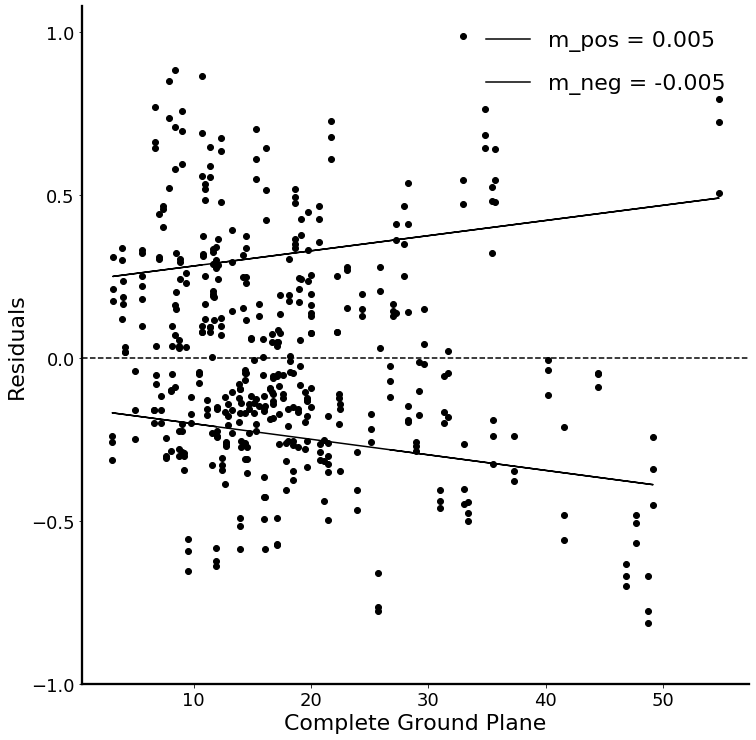

In [30]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[10,10])
plt.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)
    
#run regression
X = np.array(pos_df['groundPlane']).reshape(-1,1)
y = list(pos_df['residuals'])
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 1);
# plt.plot(X,y_predicted,color='black', label = 'm = ' + str(round(reg.coef_[0], 3))
#          + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))

plt.plot(X,y_predicted,color='black', label = 'm_pos = ' + str(round(reg.coef_[0], 3)))

X_neg = np.array(neg_df['groundPlane']).reshape(-1,1)
y_neg = list(neg_df['residuals'])
reg_neg = LinearRegression().fit(X_neg, y_neg)

#Generated Predictions
y_predicted_neg = reg_neg.predict(X_neg)
#Plot Our Actual and Predicted Values
plt.plot(X_neg, y_neg, 'o', color='black', alpha = 1);
# plt.plot(X_neg,y_predicted_neg,color='black', label = 'm = ' + str(round(reg_neg.coef_[0], 3))
#          + '     r-squared = ' + str(round(float(reg_neg.score(X_neg, y_neg)), 3)))

plt.plot(X_neg,y_predicted_neg,color='black', label = 'm_neg = ' + str(round(reg_neg.coef_[0], 3)))

plt.axhline(y=0, color='black', linestyle='--')


# plt.title("Complete Ground Plane x Target Depth", fontsize = 28)
plt.xlabel("Complete Ground Plane", fontsize = 22)
plt.ylabel("Residuals", fontsize = 22)

plt.xticks(fontsize=18)
plt.yticks(np.arange(-1,1.5, 0.5), fontsize=18)
# plt.ylim(-1.5,1.5)

legend = plt.legend(loc = 1, fontsize = 22, borderpad = 0.6, labelspacing = 1, frameon=False)

plt.savefig('pos_neg_GP_residuals.png', dpi=300)